# Check Union Features on eICU and Include Baselines

In [1]:
import mimic_pipeline as mmp
import mimic_pipeline.utils as utils

In [2]:
user = input("Enter your username: ")
password = input("Enter your password: ")
loader = utils.DataBaseLoader(user=user, password=password, dbname='eicu', schema='eicu')

In [3]:
union_df = loader['union_features']
print(union_df.shape)
union_df.head()

(193683, 52)


,uniquepid,patientunitstayid,hospital_expire_flag,preiculos,age,gcs_min,mechvent,urineoutput,heartrate_min,heartrate_max,...,pao2fio2_vent_min,admissiontype,pao2_max,pao2_min,paco2_max,paco2_min,ph_min,ph_max,aado2_min,aado2_max
0,002-34851,141168,1,0,70,NaN,0,NaN,70.0,140.0,...,NaN,Medical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,002-33870,141178,0,14,52,NaN,0,NaN,88.0,88.0,...,NaN,Medical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,002-33870,141179,0,22,52,9.0,0,1900.0,78.0,102.0,...,NaN,Medical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,002-5276,141194,0,780,68,15.0,0,NaN,72.0,108.0,...,NaN,Medical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002-37665,141196,0,99,71,15.0,0,650.0,73.0,106.0,...,NaN,Medical,70.0,70.0,45.0,45.0,7.43,7.43,NaN,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


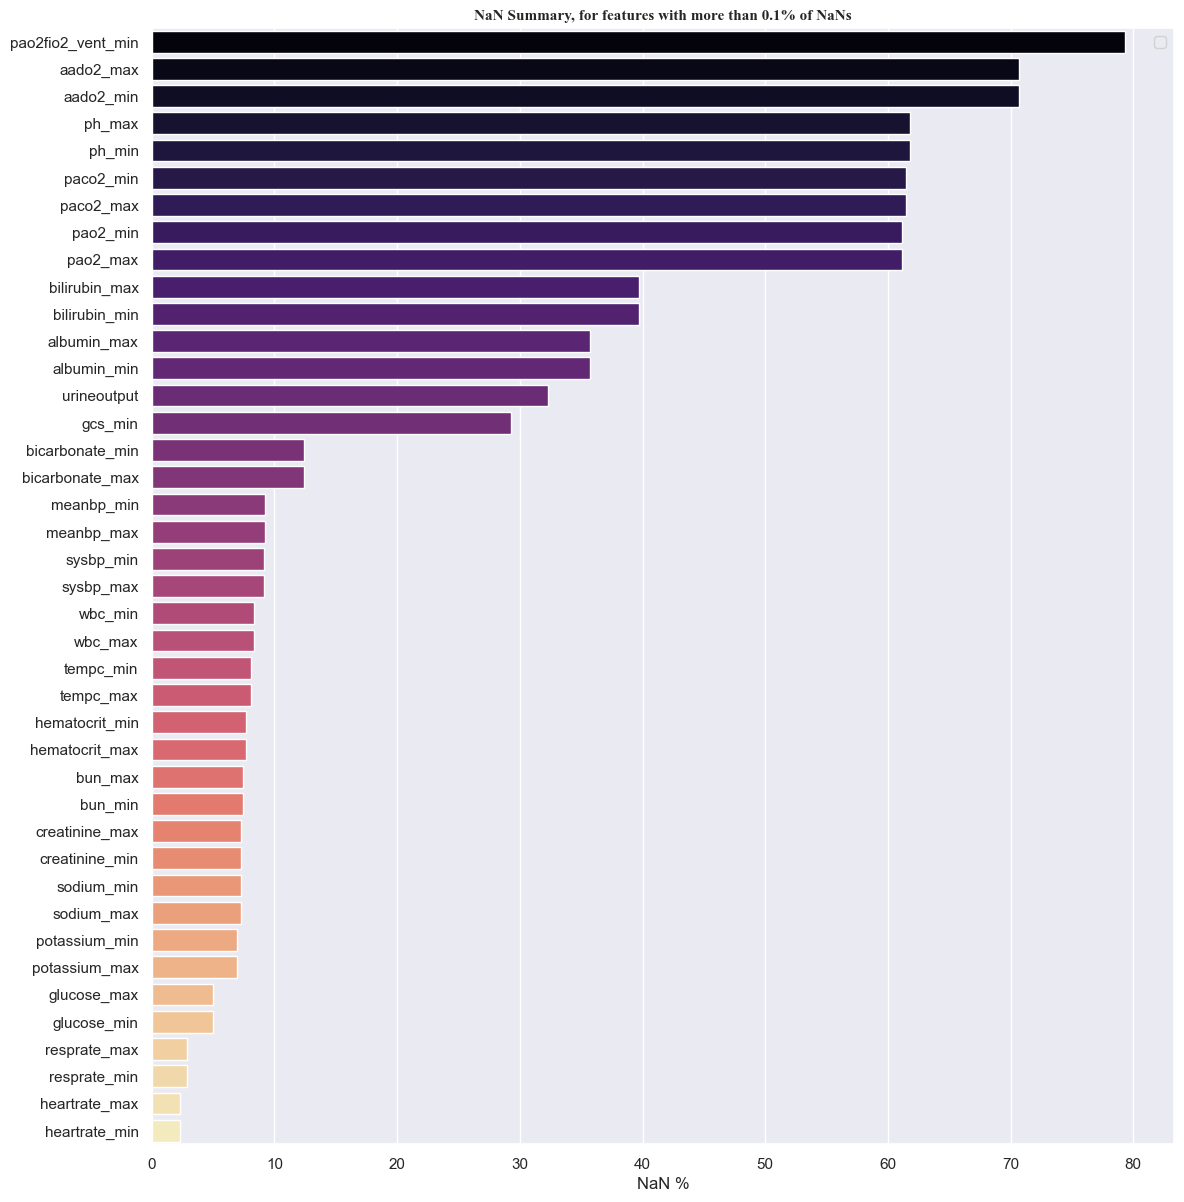

In [4]:
mmp.preprocess.plot_nan_summary(union_df, tolerance=0.001)

In [5]:
baselines_df = loader['baselines']
print(baselines_df.shape)
baselines_df.head()

(113188, 7)


,uniquepid,patientunitstayid,actualhospitalmortality,apache_iv_prob,apache_iva_prob,oasis_prob,sapsii_prob
0,002-10034,157016,0,0.022028,0.025522,0.008392,0.004584
1,002-10063,218742,0,0.051189,0.032654,0.042509,0.052195
2,002-10066,214497,0,0.061772,0.049788,0.137099,0.680887
3,002-10079,151179,1,0.868431,0.685200,0.077479,0.460662
4,002-1010,174826,0,0.034445,0.027754,0.022930,0.071716


In [6]:
union_prep_df = baselines_df.merge(union_df, on=['uniquepid', 'patientunitstayid'], how='inner')
print(union_prep_df.shape)
union_prep_df.head()

(108821, 57)


,uniquepid,patientunitstayid,actualhospitalmortality,apache_iv_prob,apache_iva_prob,oasis_prob,sapsii_prob,hospital_expire_flag,preiculos,age,...,pao2fio2_vent_min,admissiontype,pao2_max,pao2_min,paco2_max,paco2_min,ph_min,ph_max,aado2_min,aado2_max
0,002-10034,157016,0,0.022028,0.025522,0.008392,0.004584,0,3331,23,...,NaN,Medical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,002-10063,218742,0,0.051189,0.032654,0.042509,0.052195,0,2,69,...,NaN,Medical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,002-10066,214497,0,0.061772,0.049788,0.137099,0.680887,0,18,42,...,NaN,Medical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,002-10079,151179,1,0.868431,0.685200,0.077479,0.460662,1,1,59,...,NaN,Medical,91.0,91.0,26.0,26.0,7.23,7.23,82.64,82.64
4,002-1010,174826,0,0.034445,0.027754,0.022930,0.071716,0,34,64,...,NaN,Medical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import pandas as pd
pd.testing.assert_series_equal(union_prep_df['actualhospitalmortality'], union_prep_df['hospital_expire_flag'], check_names=False)

In [8]:
union_prep_df = union_prep_df.drop(columns=['actualhospitalmortality'])
union_prep_df.head()

,uniquepid,patientunitstayid,apache_iv_prob,apache_iva_prob,oasis_prob,sapsii_prob,hospital_expire_flag,preiculos,age,gcs_min,...,pao2fio2_vent_min,admissiontype,pao2_max,pao2_min,paco2_max,paco2_min,ph_min,ph_max,aado2_min,aado2_max
0,002-10034,157016,0.022028,0.025522,0.008392,0.004584,0,3331,23,NaN,...,NaN,Medical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,002-10063,218742,0.051189,0.032654,0.042509,0.052195,0,2,69,13.0,...,NaN,Medical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,002-10066,214497,0.061772,0.049788,0.137099,0.680887,0,18,42,8.0,...,NaN,Medical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,002-10079,151179,0.868431,0.685200,0.077479,0.460662,1,1,59,NaN,...,NaN,Medical,91.0,91.0,26.0,26.0,7.23,7.23,82.64,82.64
4,002-1010,174826,0.034445,0.027754,0.022930,0.071716,0,34,64,NaN,...,NaN,Medical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


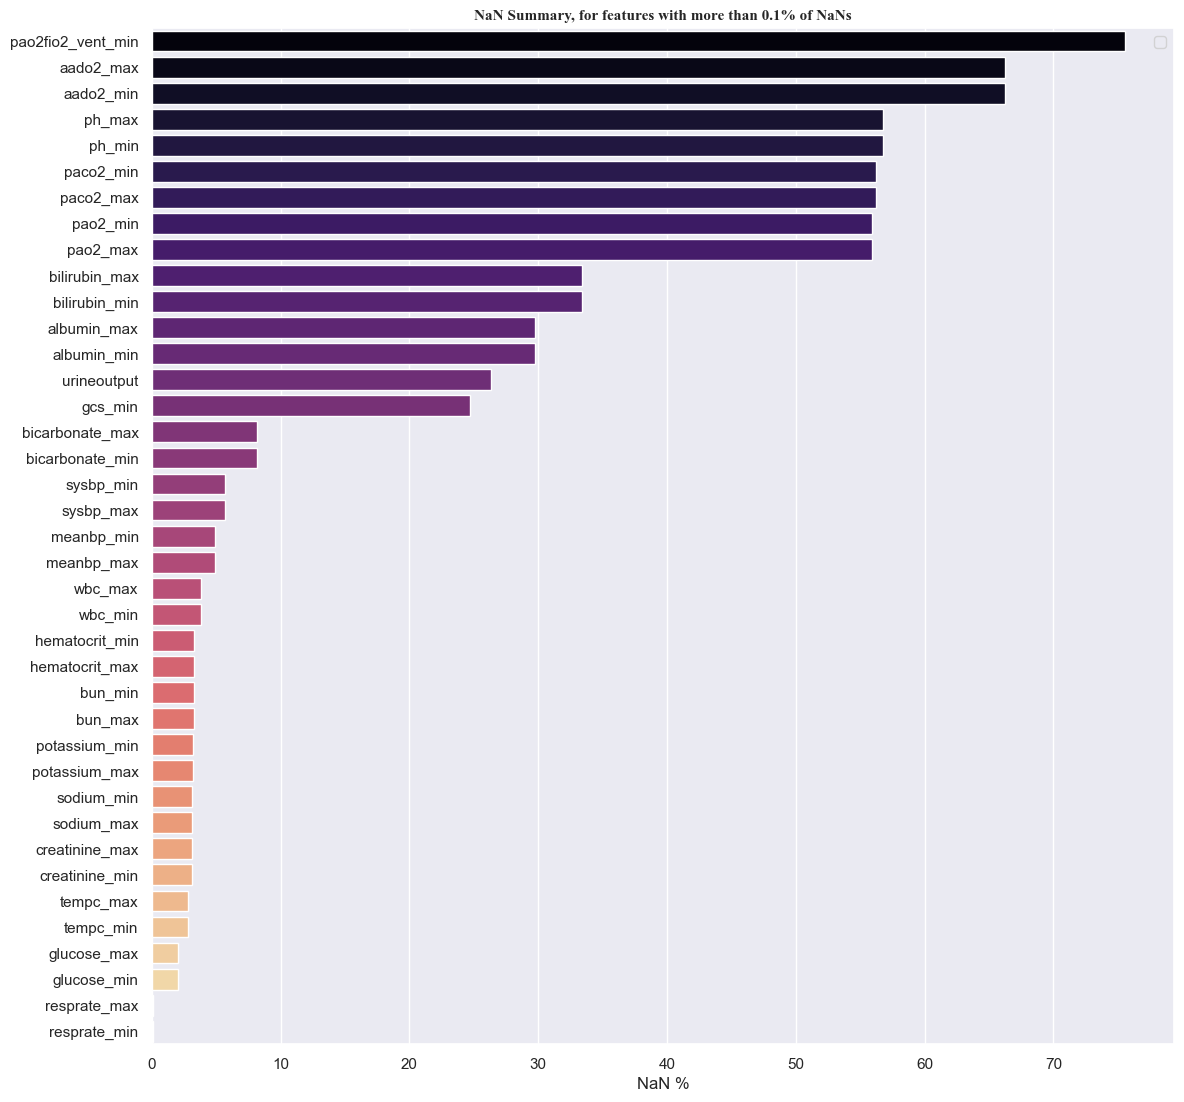

In [9]:
mmp.preprocess.plot_nan_summary(union_prep_df, tolerance=0.001)

In [10]:
assert union_prep_df['uniquepid'].is_unique
assert union_prep_df['patientunitstayid'].is_unique

check age

In [11]:
union_prep_df['age'].describe()

count    108821.000000
mean         62.075013
std          16.745380
min          16.000000
25%          52.000000
50%          64.000000
75%          75.000000
max          89.000000
Name: age, dtype: float64

Exclude patients on comfort measures only

In [12]:
cmo_patients_df = loader.query(
    """
    select patientunitstayid  
    from careplangeneral 
    where cplitemvalue = 'Comfort measures only';
    """
)
cmo_patients_df.head(10)

,patientunitstayid
0,143881
1,148673
2,151410
3,157051
4,157692
5,158076
6,158856
7,159971
8,169985
9,170836


In [13]:
print(f"Number of patients before exclusion: {len(union_prep_df)}")
union_prep_df = union_prep_df[~union_prep_df["patientunitstayid"].isin(cmo_patients_df["patientunitstayid"])]
print(f"Number of patients after exclusion: {len(union_prep_df)}")

Number of patients before exclusion: 108821
Number of patients after exclusion: 106228


In [14]:
union_prep_df['admissiontype'] = union_prep_df['admissiontype'].replace({'ScheduledSurgical': 0, 'Medical': 1, 'UnscheduledSurgical': 2})
union_prep_df.to_csv('data/eICU-union-excluded-cmo.csv', index=False)

patients

In [15]:
print(len(union_prep_df['uniquepid'].unique()))
print(len(union_prep_df['patientunitstayid'].unique()))

106228
106228
